In [ ]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 4.8 MB/s 


In [ ]:
import pickle5 as pickle
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

In [ ]:
%cd '/content/gdrive/My Drive/MDS0_k278_VuThiHa/Cau_3/'

/content/drive/MyDrive/MDS0_k278_PhamCaoSang/Cong_viec_03_RNN_LSTM


In [ ]:
with open('tokenizer.pickle', 'rb') as handle:
  tokenizer = pickle.load(handle)

In [ ]:
data = pd.read_csv("process_data.csv", index_col=0)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82380 entries, 0 to 82379
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   text            82378 non-null  object
 1   rating          82380 non-null  int64 
 2   sentiment       82380 non-null  object
 3   output          82380 non-null  int64 
 4   processed_text  81778 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.8+ MB


In [ ]:
X = data['processed_text'].astype(str)
y = data['output']
max_features = 500

In [ ]:
token = Tokenizer(num_words = max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
token.fit_on_texts(X)
sequences = token.texts_to_sequences(X)
sequences_matrix_X = sequence.pad_sequences(sequences)

In [ ]:
X_s, y_s = SMOTE().fit_resample(sequences_matrix_X, y)
print(sorted(Counter(y_s).items()))

[(0, 69659), (1, 69659)]


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_s, y_s, test_size=0.1, random_state=42)

In [ ]:
# Define model RNN
model = Sequential()
model.add(Embedding(1000, 256))
model.add(LSTM(256))
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# compile
model.compile(loss ='binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         256000    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_3 (Dense)             (None, 512)               131584    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                      

In [ ]:
def scheduler(epoch, lr):
    if epoch < 2:
        return 0.001
    if epoch < 4:
        return 0.0005
    if epoch < 6:
        return 0.0002
    if epoch < 8:
        return 0.0001
    return 0.00005

In [ ]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 100, validation_split = 0.1, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5), LearningRateScheduler(scheduler)])

Epoch 1/100
882/882 [==============================] - 27s 28ms/step - loss: 0.4047 - accuracy: 0.8206 - val_loss: 0.4016 - val_accuracy: 0.8324 - lr: 0.0010
Epoch 2/100
882/882 [==============================] - 24s 28ms/step - loss: 0.3089 - accuracy: 0.8673 - val_loss: 0.3407 - val_accuracy: 0.8506 - lr: 0.0010
Epoch 3/100
882/882 [==============================] - 24s 28ms/step - loss: 0.2668 - accuracy: 0.8859 - val_loss: 0.2774 - val_accuracy: 0.8785 - lr: 5.0000e-04
Epoch 4/100
882/882 [==============================] - 25s 28ms/step - loss: 0.2534 - accuracy: 0.8919 - val_loss: 0.2853 - val_accuracy: 0.8776 - lr: 5.0000e-04
Epoch 5/100
882/882 [==============================] - 25s 28ms/step - loss: 0.2351 - accuracy: 0.9002 - val_loss: 0.2743 - val_accuracy: 0.8864 - lr: 2.0000e-04
Epoch 6/100
882/882 [==============================] - 25s 28ms/step - loss: 0.2289 - accuracy: 0.9038 - val_loss: 0.2784 - val_accuracy: 0.8869 - lr: 2.0000e-04
Epoch 7/100
882/882 [===============

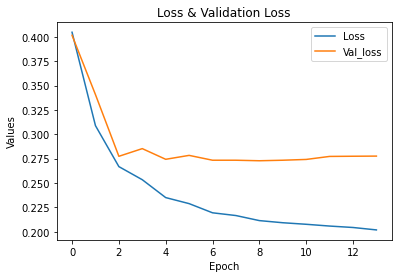

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss & Validation Loss')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_loss'])
plt.show()

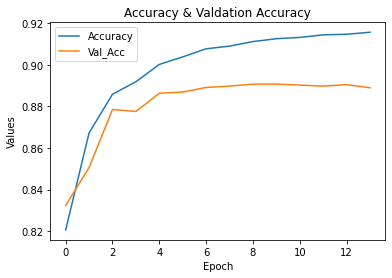

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy & Valdation Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Acc'])
plt.show()

In [ ]:
##test accuracy 
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

436/436 [==============================] - 3s 6ms/step - loss: 0.2785 - accuracy: 0.8844
Test set
  Loss: 0.279
  Accuracy: 0.884


In [ ]:
result_test = model.predict(X_test)
result_test

array([[1.0046723e-03],
       [1.1671359e-04],
       [8.7920803e-01],
       ...,
       [7.9191977e-01],
       [4.7470376e-01],
       [9.1326225e-01]], dtype=float32)

In [ ]:
result_test = result_test > 0.5
result_test

array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

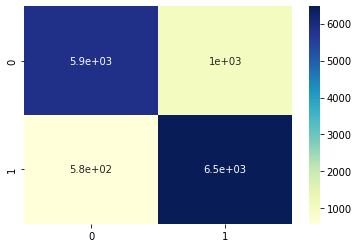

In [ ]:
matrix = confusion_matrix(y_true = Y_test, y_pred = result_test, labels = [0, 1] )
sns.heatmap(matrix, annot=True, annot_kws={"size": 10}, cmap="YlGnBu")
plt.show()

In [ ]:
print(classification_report(y_true = Y_test, y_pred = result_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      6881
           1       0.86      0.92      0.89      7051

    accuracy                           0.88     13932
   macro avg       0.89      0.88      0.88     13932
weighted avg       0.89      0.88      0.88     13932

